In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Let's create systhetic data points
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000,
                         n_features = 2,
                         n_classes = 2,
                         n_clusters_per_class = 2,
                         n_redundant = 0)

In [3]:
X

array([[-0.66004782, -0.21087258],
       [ 0.65842651,  3.11462526],
       [ 0.60002697, -0.64409515],
       ...,
       [ 0.35665402,  2.91052514],
       [-1.01558307,  1.14421374],
       [ 0.92428041,  1.8125879 ]])

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

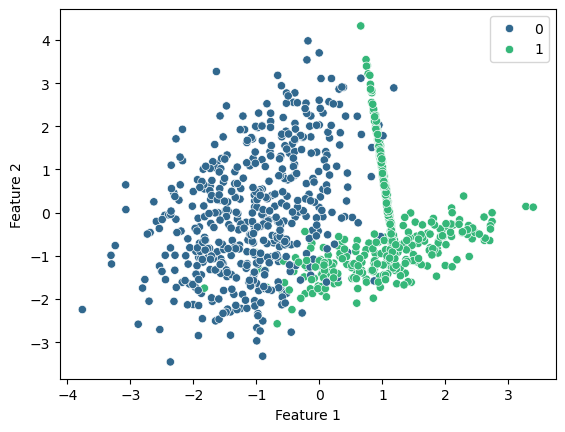

In [4]:
# Convert X to a DataFrame
df_X = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Create scatter plot
sns.scatterplot(x=df_X['Feature 1'], y=df_X['Feature 2'], hue=y, palette="viridis")

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33 , random_state = 10)

In [12]:
## With linear Kernel
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
svc.coef_

array([[ 2.69395511, -0.64560371]])

In [13]:
## Prediction
y_pred = svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       168
           1       0.95      0.96      0.95       162

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

[[159   9]
 [  6 156]]


In [14]:
## With rbf kernel
from sklearn.svm import SVC
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train,y_train)
## Prediction 
y_pred1 = rbf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       168
           1       0.95      0.99      0.97       162

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

[[159   9]
 [  2 160]]


In [16]:
## With Polynomial kernel
from sklearn.svm import SVC
poly = SVC(kernel = 'poly')
poly.fit(X_train,y_train)
## Prediction 
y_pred2 = poly.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       168
           1       0.98      0.95      0.97       162

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

[[165   3]
 [  8 154]]


In [17]:
## With sigmoid kernel
from sklearn.svm import SVC
sigmoid = SVC(kernel = 'sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction 
y_pred3 = poly.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       168
           1       0.98      0.95      0.97       162

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

[[165   3]
 [  8 154]]


In [24]:
sigmoid.intercept_

array([0.04390945])

## Hyperparameter Tuning with SVC

In [18]:
from sklearn.model_selection import GridSearchCV
## defining parameter range
param_grid = {'C':[0.1,1.0,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['linear','rbf','poly','sigmoid']}

In [20]:
grid = GridSearchCV(SVC(),param_grid = param_grid,
                   refit = True,
                   cv = 5,
                   verbose = 3)

In [21]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
##Prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       168
           1       0.94      0.99      0.96       162

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

[[158  10]
 [  2 160]]
